In [1]:
%matplotlib notebook
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import os
from keras.utils.io_utils import HDF5Matrix
import tables
#import plot_conf

Using Theano backend.


In [72]:
[ f_name for f_name in os.listdir(os.path.join(
            '/data/ana/PointSource/PS/IC86_2012/files/sim/2012/neutrino-generator/','11069/00000-00999')) 
 if f_name[-6:]=='i3.bz2']

['Final_v2_nugen_numu_IC86.2012.011069.000545.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000420.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000667.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000120.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000457.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000579.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000875.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000660.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000067.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000619.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000697.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000302.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000735.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000985.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000082.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000524.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000731.i3.bz2',
 'Final_v2_nugen_numu_IC86.2012.011069.000053.i3.bz2',
 'Final_v2

In [2]:
base_path = '/data/user/tglauch/ML_Reco'
data_file = os.path.join(base_path, 'training_data/11069_00000-00999.h5')

In [12]:
h5 = tables.open_file(data_file)

In [13]:
h5

File(filename=/data/user/tglauch/ML_Reco/training_data/11069_00000-00999.h5, title='Events for training the NN', mode='r', root_uep='/', filters=Filters(complevel=9, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Events for training the NN'
/charge (EArray(207254, 1, 21, 21, 51), shuffle, zlib(9)) 'Charge Distribution'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 21, 21, 51)
/reco_vals (EArray(207254, 4), shuffle, zlib(9)) 'Energy,Azimuth,Zenith,MuEx'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (2048, 4)
/time (EArray(207254, 1, 21, 21, 51), shuffle, zlib(9)) 'Timestamp Distribution'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 21, 21, 51)

In [68]:
h5.root.reco_vals[0:10,0] # in GeV

array([  1.88281374e+04,   3.06489951e+02,   6.31385453e+05,
         1.54153525e+06,   1.84556165e+06,   1.12612139e+04,
         1.61442852e+04,   5.16582155e+04,   3.32911077e+06,
         1.43647570e+03])

In [69]:
h5.root.reco_vals[0:10,2]*180/np.pi

array([ 109.13984754,  167.00967208,  153.90640906,  143.15275989,
        113.259849  ,   22.66370285,   86.86078674,  107.99467479,
         44.46638642,  169.22468696])

In [4]:
data = HDF5Matrix(data_file, 'charge')

In [44]:
index = 0

In [45]:
data.data[index].squeeze().shape

(21, 21, 51)

In [80]:
for index in range(1,20):
    xlen = np.shape(data.data[index])[1]
    ylen = np.shape(data.data[index])[2]
    zlen = np.shape(data.data[index])[3]
    
    x,y,z = np.meshgrid(range(xlen), range(ylen), range(zlen))
    hits = np.concatenate(np.concatenate(data.data[index].squeeze()))
    
    print "index:", index
    print stats.describe(np.pi*(0.5*hits)**2)

index: 1
DescribeResult(nobs=22491, minmax=(0.0, 226.31296434598158), mean=0.024127723081664845, variance=3.1068429116338545, skewness=107.71244562559029, kurtosis=12818.925779496121)
index: 2
DescribeResult(nobs=22491, minmax=(0.0, 200.43409977978101), mean=0.038665585725082816, variance=4.2731836705409298, skewness=79.6482228266538, kurtosis=6918.670517781576)
index: 3
DescribeResult(nobs=22491, minmax=(0.0, 41385.143869551619), mean=5.1244243387058805, variance=140254.03199207637, skewness=101.29877360752562, kurtosis=10603.667315089548)
index: 4
DescribeResult(nobs=22491, minmax=(0.0, 13913.807674605649), mean=3.0525900133275892, variance=17592.861647053429, skewness=73.78846372511696, kurtosis=6599.9941133207185)
index: 5
DescribeResult(nobs=22491, minmax=(0.0, 57.414571801390068), mean=0.0097740447173449794, variance=0.21667653570118045, skewness=98.65743189761837, kurtosis=11198.350590526108)
index: 6
DescribeResult(nobs=22491, minmax=(0.0, 18223.5191503151), mean=0.847159883922

index: 0
Energy: 18828.1GeV


<IPython.core.display.Javascript object>


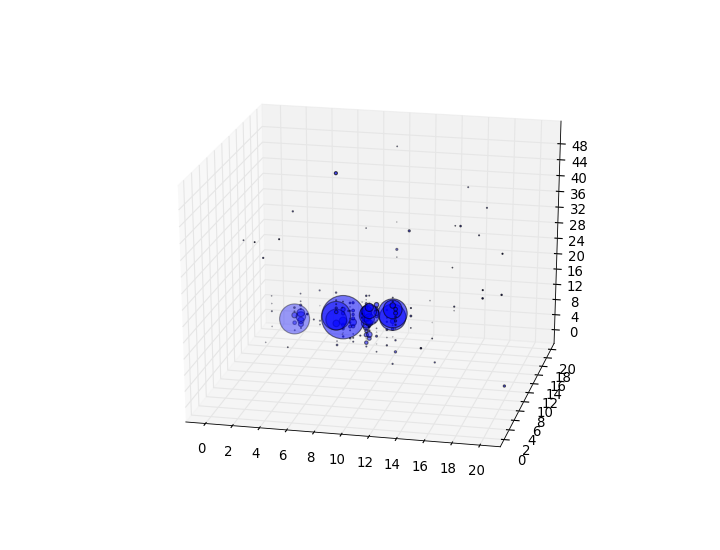

index: 1
Energy: 306.5GeV


<IPython.core.display.Javascript object>


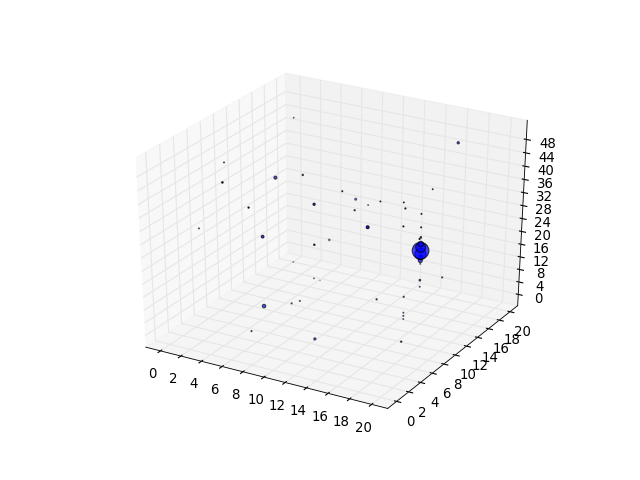

index: 2
Energy: 631385.5GeV


<IPython.core.display.Javascript object>


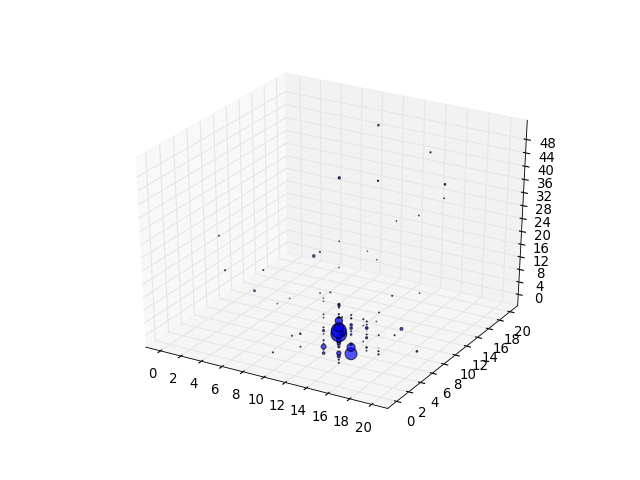

index: 3
Energy: 1541535.2GeV


<IPython.core.display.Javascript object>


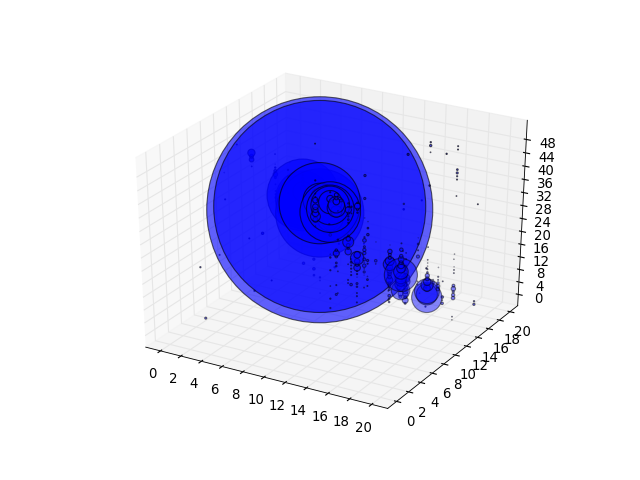

index: 4
Energy: 1845561.7GeV


<IPython.core.display.Javascript object>


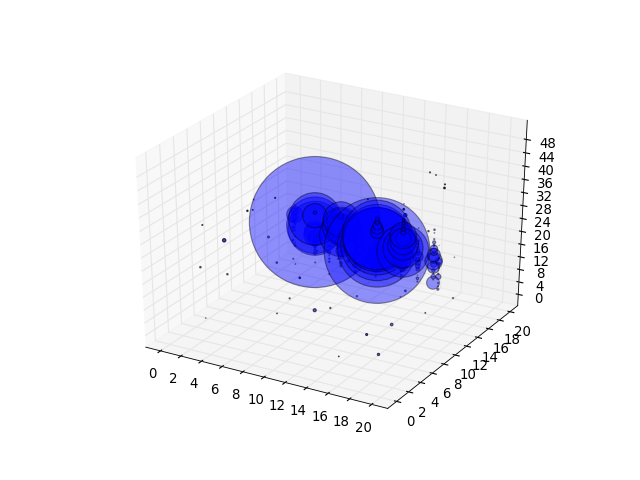

In [15]:
for index in range(0,5):
    xlen = np.shape(data.data[index])[1]
    ylen = np.shape(data.data[index])[2]
    zlen = np.shape(data.data[index])[3]
    
    x,y,z = np.meshgrid(range(xlen), range(ylen), range(zlen))
    hits = np.concatenate(np.concatenate(data.data[index].squeeze()))
    
    print "index:", index
    print "Energy: {:5.1f}GeV".format(h5.root.reco_vals[index, 0])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xticks(filter(lambda x: x%2==0,range(xlen)), minor=False)
    ax.set_xticks(filter(lambda x: x%2!=0,range(xlen)), minor=True)
    ax.set_yticks(filter(lambda x: x%2==0,range(ylen)), minor=False)
    ax.set_yticks(filter(lambda x: x%2!=0,range(ylen)), minor=True)
    ax.set_zticks(filter(lambda x: x%4==0,range(zlen)), minor=False)
    ax.set_zticks(filter(lambda x: x%4!=0,range(zlen)), minor=True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.zaxis.grid(True, which='minor')
    ax.xaxis.grid(True, which='major')
    ax.yaxis.grid(True, which='major')
    ax.zaxis.grid(True, which='major')
    #dot_size = normalize(np.pi*(0.5*hits)**2) * 10e3
    dot_size = np.pi*(0.5*hits)**2
    ax.scatter(x.flatten(),y.flatten(),z.flatten(),
               s=dot_size,
              )
    #plt.savefig('3d_event_view.pdf')
    plt.show()